In [1]:
import pandas as pd
import numpy as np
import re
# !pip install --upgrade plotly 
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.set_option('display.max_colwidth', None)

In [3]:
gd = pd.read_csv('./scrapy_csv_files/glassdoor_best_places_to_work/glassdoorfinal.csv')
rank = pd.read_csv('./scrapy_csv_files/glassdoor_ranks/rank_final.csv')

In [4]:
gd

benefits_n_reviews  benefits_rating  ceo_score                  company  \
0                   488              4.7       91.0                 Facebook   
1                   191              2.9       90.0  BAYADA Home Health Care   
2                   799              3.9       91.0                     KPMG   
3                   693              3.9       80.0      Walt Disney Company   
4                    64              1.9       94.0         Liberty National   
..                  ...              ...        ...                      ...   
625                 198              4.0       92.0                lululemon   
626                1243              4.6       92.0                   Google   
627                 156              4.3       95.0          In-N-Out Burger   
628                 167              4.7       94.0  Boston Consulting Group   
629                 113              4.8       99.0           Bain & Company   

                              cotype  culture_score           employee_count  \
0             Company - Public (FB)             4.4         10000+ employees   
1                  Company - Private            4.1         10000+ employees   
2     Subsidiary or Business Segment            3.7         10000+ employees   
3            Company - Public (DIS)             3.8         10000+ employees   
4                               1900            4.1   1001 to 5000 employees   
..                               ...            ...                      ...   
625         Company - Public (LULU)             4.1   1001 to 5000 employees   
626         Company - Public (GOOG)             4.4         10000+ employees   
627                Company - Private            4.3         10000+ employees   
628                Company - Private            4.2                  Unknown   
629                Company - Private            4.6  5001 to 10000 employees   

     end_date founded                                   industry  \
0    10/22/17    2004                                   Internet   
1    10/22/17    1975           Health Care Services & Hospitals   
2    10/22/17    1987                                 Accounting   
3    10/22/17    1923   Motion Picture Production & Distribution   
4    10/22/17     NaN             Subsidiary or Business Segment   
..        ...     ...                                        ...   
625  10/22/17    1998        Department, Clothing, & Shoe Stores   
626  10/22/17    1998                                   Internet   
627  10/22/17    1948      Fast-Food & Quick-Service Restaurants   
628  10/22/17    1963                                 Consulting   
629  10/22/17    1973                                 Consulting   

     interview_difficulty interview_n_reviews                location  \
0                     3.1               5,197          Menlo Park, CA   
1                     2.6                 292          Moorestown, NJ   
2                     2.9               6,232            New York, NY   
3                     2.7               1,311             Burbank, CA   
4                     1.8                 278            McKinney, TX   
..                    ...                 ...                     ...   
625                   2.4               1,084  Vancouver, BC (Canada)   
626                   3.3               9,870       Mountain View, CA   
627                   2.3                 408              Irvine, CA   
628                   3.7               1,600              Boston, MA   
629                   3.6               1,203              Boston, MA   

     negative_xp  neutral_xp  number_reviews  positive_xp  recommendation  \
0             21          22            1444           57              87   
1             17          15            1677           68              81   
2             11          19            2915           70              73   
3             11          18            4100           71              75   
4   

In [5]:
gd['start_date'].unique()

array(['11/1/16', '11/2/15', '11/2/14', nan, '10/23/17'], dtype=object)

In [6]:
gd.loc[gd.start_date == '11/1/16','year'] = float(2018)
gd.loc[gd.start_date == '11/2/15','year'] = float(2017)
gd.loc[gd.start_date == '11/2/14','year'] = float(2016)
gd.loc[gd.start_date == '10/23/17','year'] = float(2019)

In [8]:
gd = gd.drop(['start_date','end_date'],1)
gd

benefits_n_reviews  benefits_rating  ceo_score                  company  \
0                   488              4.7       91.0                 Facebook   
1                   191              2.9       90.0  BAYADA Home Health Care   
2                   799              3.9       91.0                     KPMG   
3                   693              3.9       80.0      Walt Disney Company   
4                    64              1.9       94.0         Liberty National   
..                  ...              ...        ...                      ...   
625                 198              4.0       92.0                lululemon   
626                1243              4.6       92.0                   Google   
627                 156              4.3       95.0          In-N-Out Burger   
628                 167              4.7       94.0  Boston Consulting Group   
629                 113              4.8       99.0           Bain & Company   

                              cotype  culture_score           employee_count  \
0             Company - Public (FB)             4.4         10000+ employees   
1                  Company - Private            4.1         10000+ employees   
2     Subsidiary or Business Segment            3.7         10000+ employees   
3            Company - Public (DIS)             3.8         10000+ employees   
4                               1900            4.1   1001 to 5000 employees   
..                               ...            ...                      ...   
625         Company - Public (LULU)             4.1   1001 to 5000 employees   
626         Company - Public (GOOG)             4.4         10000+ employees   
627                Company - Private            4.3         10000+ employees   
628                Company - Private            4.2                  Unknown   
629                Company - Private            4.6  5001 to 10000 employees   

    founded                                   industry  interview_difficulty  \
0      2004                                   Internet                   3.1   
1      1975           Health Care Services & Hospitals                   2.6   
2      1987                                 Accounting                   2.9   
3      1923   Motion Picture Production & Distribution                   2.7   
4       NaN             Subsidiary or Business Segment                   1.8   
..      ...                                        ...                   ...   
625    1998        Department, Clothing, & Shoe Stores                   2.4   
626    1998                                   Internet                   3.3   
627    1948      Fast-Food & Quick-Service Restaurants                   2.3   
628    1963                                 Consulting                   3.7   
629    1973                                 Consulting                   3.6   

    interview_n_reviews                location  negative_xp  neutral_xp  \
0                 5,197          Menlo Park, CA           21          22   
1                   292          Moorestown, NJ           17          15   
2                 6,232            New York, NY           11          19   
3                 1,311             Burbank, CA           11          18   
4                   278            McKinney, TX           38          23   
..                  ...                     ...          ...         ...   
625               1,084  Vancouver, BC (Canada)           17          21   
626               9,870       Mountain View, CA           16          23   
627                 408              Irvine, CA            7          15   
628               1,600              Boston, MA           12          17   
629               1,203              Boston, MA            7          18   

     number_reviews  positive_xp  recommendation  \
0              1444           57              87   
1              1677           68              81   
2              2915           70              73   
3

In [9]:
gd.cotype.sort_values()[0:49].index

Int64Index([543, 414,  32, 526, 386, 604, 439, 482, 162,   4, 397, 450, 539,
             54, 554, 405, 260, 143, 425, 507, 371, 457, 209, 308, 153, 160,
            566, 597, 515, 442, 603, 567,  73,  64, 598, 401, 387, 321, 485,
            419, 531, 108, 271, 610, 392, 333,   8, 378,  57],
           dtype='int64')

In [10]:
for i in gd.cotype.sort_values()[0:49].index:
    gd.founded[i] = gd.cotype[i]
    gd.cotype[i] = ''
    

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
gd[~gd.location.str.contains(',')].location

205    Frankfurt am Main (Germany)
445        Fuschl am See (Austria)
540       Herzogenaurach (Germany)
Name: location, dtype: object

In [12]:
gd.location[205] = 'Frankfurt am Main, Germany'
gd.location[445] = 'Fuschl am See, Austria' 
gd.location[540] = 'Herzogenaurach, Germany'

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
cs = gd.location.str.split(',',1,expand= True)
gd['city'] = cs[0]
gd['state'] = cs[1]

In [14]:
gd.cotype = gd.cotype.str.replace(r"\(.*\)","")

In [15]:
gd = gd.drop('location', axis =1)

In [16]:
gd

benefits_n_reviews  benefits_rating  ceo_score                  company  \
0                   488              4.7       91.0                 Facebook   
1                   191              2.9       90.0  BAYADA Home Health Care   
2                   799              3.9       91.0                     KPMG   
3                   693              3.9       80.0      Walt Disney Company   
4                    64              1.9       94.0         Liberty National   
..                  ...              ...        ...                      ...   
625                 198              4.0       92.0                lululemon   
626                1243              4.6       92.0                   Google   
627                 156              4.3       95.0          In-N-Out Burger   
628                 167              4.7       94.0  Boston Consulting Group   
629                 113              4.8       99.0           Bain & Company   

                              cotype  culture_score           employee_count  \
0                 Company - Public              4.4         10000+ employees   
1                  Company - Private            4.1         10000+ employees   
2     Subsidiary or Business Segment            3.7         10000+ employees   
3                 Company - Public              3.8         10000+ employees   
4                                               4.1   1001 to 5000 employees   
..                               ...            ...                      ...   
625               Company - Public              4.1   1001 to 5000 employees   
626               Company - Public              4.4         10000+ employees   
627                Company - Private            4.3         10000+ employees   
628                Company - Private            4.2                  Unknown   
629                Company - Private            4.6  5001 to 10000 employees   

    founded                                   industry  interview_difficulty  \
0      2004                                   Internet                   3.1   
1      1975           Health Care Services & Hospitals                   2.6   
2      1987                                 Accounting                   2.9   
3      1923   Motion Picture Production & Distribution                   2.7   
4      1900             Subsidiary or Business Segment                   1.8   
..      ...                                        ...                   ...   
625    1998        Department, Clothing, & Shoe Stores                   2.4   
626    1998                                   Internet                   3.3   
627    1948      Fast-Food & Quick-Service Restaurants                   2.3   
628    1963                                 Consulting                   3.7   
629    1973                                 Consulting                   3.6   

    interview_n_reviews  negative_xp  neutral_xp  number_reviews  positive_xp  \
0                 5,197           21          22            1444           57   
1                   292           17          15            1677           68   
2                 6,232           11          19            2915           70   
3                 1,311           11          18            4100           71   
4                   278           38          23             703           39   
..                  ...          ...         ...             ...          ...   
625               1,084           17          21            1745           62   
626               9,870           16          23            9301           61   
627                 408            7          15            1414           78   
628               1,600           12          17            2186           71   
629               1,203            7          18            2679           75   

     recommendation                               revenue  \
0                87           $10+ billion (USD) per year   
1                81       $

In [17]:
miss = gd.loc[(gd.cotype =='')].index 

In [18]:
gd.loc[miss,'cotype']  = gd.loc[miss,'industry']

In [19]:
gd.loc[miss,'industry']= gd.loc[miss,'revenue']

In [20]:
gd.loc[miss,'revenue'] = np.nan

In [21]:
miss1 = gd.loc[gd.industry ==' $10+ billion (USD) per year' ].index

In [22]:
gd.loc[miss1,'revenue'] = gd.loc[miss1,'industry']
gd.loc[miss1, 'industry'] = np.nan

In [23]:
gd.loc[miss1]

benefits_n_reviews  benefits_rating  ceo_score           company  \
145                 361              4.0       88.0  Procter & Gamble   
196                 361              4.0       88.0  Procter & Gamble   
228                 361              4.0       88.0  Procter & Gamble   
273                 361              4.0       88.0  Procter & Gamble   
362                 361              4.0       88.0  Procter & Gamble   
431                 361              4.0       88.0  Procter & Gamble   
570                 361              4.0       88.0  Procter & Gamble   

                  cotype  culture_score    employee_count founded industry  \
145   Company - Public              4.0  10000+ employees    1837      NaN   
196   Company - Public              4.0  10000+ employees    1837      NaN   
228   Company - Public              4.0  10000+ employees    1837      NaN   
273   Company - Public              4.0  10000+ employees    1837      NaN   
362   Company - Public              4.0  10000+ employees    1837      NaN   
431   Company - Public              4.0  10000+ employees    1837      NaN   
570   Company - Public              4.0  10000+ employees    1837      NaN   

     interview_difficulty interview_n_reviews  negative_xp  neutral_xp  \
145                   3.3               2,698            9          21   
196                   3.3               2,698            9          21   
228                   3.3               2,698            9          21   
273                   3.3               2,698            9          21   
362                   3.3               2,698            9          21   
431                   3.3               2,698            9          21   
570                   3.3               2,698            9          21   

     number_reviews  positive_xp  recommendation  \
145            6638           70              84   
196            6638           70              84   
228            6639           70              84   
273            6639           70              84   
362            6638           70              84   
431            6639           70              84   
570            6638           70              84   

                          revenue  \
145   $10+ billion (USD) per year   
196   $10+ billion (USD) per year   
228   $10+ billion (USD) per year   
273   $10+ billion (USD) per year   
362   $10+ billion (USD) per year   
431   $10+ billion (USD) per year   
570   $10+ billion (USD) per year   

                                                                                  reviewscon  \
145  algumas pessoas com a mentalidade muito fora da P G Work life balance could be improved   
196  algumas pessoas com a mentalidade muito fora da P G Work life balance could be improved   
228  algumas pessoas com a mentalidade muito fora da P G Work life balance could be improved   
273  algumas pessoas com a mentalidade muito fora da P G Work life balance could be improved   
362  algumas pessoas com a mentalidade muito fora da P G Work life balance could be improved   
431  algumas pessoas com a mentalidade muito fora da P G Work life balance could be improved   
570  algumas pessoas com a mentalidade muito fora da P G Work life balance could be improved   

                                                                                                                                                 reviewspro  \
145  People at P G are known for being top notch they re always happy to help regardless of their ranking in the company Work life balance is well promoted   
196  People at P G are known for being top notch they re always happy to help regardless of their ranking in the company Work life balance is well promoted   
228  People at P G are known for being top notch they re always happy to help regardless of their ranking in the company Work life balance is well promoted   
273  People at P G are known for being top notch they re always happy to help regar

In [24]:
miss2 = gd.loc[gd.industry ==' $2 to $5 billion (USD) per year'].index

In [25]:
gd.loc[miss2,'revenue'] = gd.loc[miss2,'industry']
gd.loc[miss2, 'industry'] = np.nan

In [26]:
gd.loc[miss2]

benefits_n_reviews  benefits_rating  ceo_score           company  \
140                 221              4.2       80.0  Juniper Networks   
195                 221              4.2       80.0  Juniper Networks   

                  cotype  culture_score           employee_count founded  \
140   Company - Public              3.7  5001 to 10000 employees    1996   
195   Company - Public              3.7  5001 to 10000 employees    1996   

    industry  interview_difficulty interview_n_reviews  negative_xp  \
140      NaN                   3.1                 476           17   
195      NaN                   3.1                 476           17   

     neutral_xp  number_reviews  positive_xp  recommendation  \
140          18            2176           65              72   
195          18            2176           65              72   

                              revenue  \
140   $2 to $5 billion (USD) per year   
195   $2 to $5 billion (USD) per year   

                                                                                                               reviewscon  \
140  Work life balance is little messed up Work gets repetitive and upper management sometimes meddles a lot in your work   
195  Work life balance is little messed up Work gets repetitive and upper management sometimes meddles a lot in your work   

                                                             reviewspro  \
140  Work life balance is maintained Good work environment and exposure   
195  Work life balance is maintained Good work environment and exposure   

    ticker          website    year       city state  
140   JNPR  www.juniper.net  2009.0  Sunnyvale    CA  
195   JNPR  www.juniper.net  2010.0  Sunnyvale    CA

In [27]:
rank = rank.drop('Unnamed: 0',1)

In [28]:
rank

year rank                    company  score
0    2019.0   #1             Bain & Company    4.6
1    2019.0   #2  Zoom Video Communications    4.5
2    2019.0   #3            In-N-Out Burger    4.5
3    2019.0   #4       Procore Technologies    4.5
4    2019.0   #5    Boston Consulting Group    4.5
..      ...  ...                        ...    ...
628  2009.0  #46                   Best Buy    3.5
629  2009.0  #47                 Salesforce    3.5
630  2009.0  #48                  Accenture    3.5
631  2009.0  #49                      FedEx    3.5
632  2009.0  #50                    Paychex    3.5

[633 rows x 4 columns]

In [29]:
gd = gd.merge(rank, how = 'inner', on = ['year','company'])

In [30]:
gd

benefits_n_reviews  benefits_rating  ceo_score                  company  \
0                   488              4.7       91.0                 Facebook   
1                   191              2.9       90.0  BAYADA Home Health Care   
2                   799              3.9       91.0                     KPMG   
3                   693              3.9       80.0      Walt Disney Company   
4                    64              1.9       94.0         Liberty National   
..                  ...              ...        ...                      ...   
618                 198              4.0       92.0                lululemon   
619                1243              4.6       92.0                   Google   
620                 156              4.3       95.0          In-N-Out Burger   
621                 167              4.7       94.0  Boston Consulting Group   
622                 113              4.8       99.0           Bain & Company   

                              cotype  culture_score           employee_count  \
0                 Company - Public              4.4         10000+ employees   
1                  Company - Private            4.1         10000+ employees   
2     Subsidiary or Business Segment            3.7         10000+ employees   
3                 Company - Public              3.8         10000+ employees   
4     Subsidiary or Business Segment            4.1   1001 to 5000 employees   
..                               ...            ...                      ...   
618               Company - Public              4.1   1001 to 5000 employees   
619               Company - Public              4.4         10000+ employees   
620                Company - Private            4.3         10000+ employees   
621                Company - Private            4.2                  Unknown   
622                Company - Private            4.6  5001 to 10000 employees   

    founded                                   industry  interview_difficulty  \
0      2004                                   Internet                   3.1   
1      1975           Health Care Services & Hospitals                   2.6   
2      1987                                 Accounting                   2.9   
3      1923   Motion Picture Production & Distribution                   2.7   
4      1900                         Insurance Carriers                   1.8   
..      ...                                        ...                   ...   
618    1998        Department, Clothing, & Shoe Stores                   2.4   
619    1998                                   Internet                   3.3   
620    1948      Fast-Food & Quick-Service Restaurants                   2.3   
621    1963                                 Consulting                   3.7   
622    1973                                 Consulting                   3.6   

    interview_n_reviews  negative_xp  neutral_xp  number_reviews  positive_xp  \
0                 5,197           21          22            1444           57   
1                   292           17          15            1677           68   
2                 6,232           11          19            2915           70   
3                 1,311           11          18            4100           71   
4                   278           38          23             703           39   
..                  ...          ...         ...             ...          ...   
618               1,084           17          21            1745           62   
619               9,870           16          23            9301           61   
620                 408            7          15            1414           78   
621               1,600           12          17            2186           71   
622               1,203            7          18            2679           75   

     recommendation                               revenue  \
0                87           $10+ billion (USD) per year   
1                81       $

In [31]:
gd_copy = gd

In [32]:
gd_copy

benefits_n_reviews  benefits_rating  ceo_score                  company  \
0                   488              4.7       91.0                 Facebook   
1                   191              2.9       90.0  BAYADA Home Health Care   
2                   799              3.9       91.0                     KPMG   
3                   693              3.9       80.0      Walt Disney Company   
4                    64              1.9       94.0         Liberty National   
..                  ...              ...        ...                      ...   
618                 198              4.0       92.0                lululemon   
619                1243              4.6       92.0                   Google   
620                 156              4.3       95.0          In-N-Out Burger   
621                 167              4.7       94.0  Boston Consulting Group   
622                 113              4.8       99.0           Bain & Company   

                              cotype  culture_score           employee_count  \
0                 Company - Public              4.4         10000+ employees   
1                  Company - Private            4.1         10000+ employees   
2     Subsidiary or Business Segment            3.7         10000+ employees   
3                 Company - Public              3.8         10000+ employees   
4     Subsidiary or Business Segment            4.1   1001 to 5000 employees   
..                               ...            ...                      ...   
618               Company - Public              4.1   1001 to 5000 employees   
619               Company - Public              4.4         10000+ employees   
620                Company - Private            4.3         10000+ employees   
621                Company - Private            4.2                  Unknown   
622                Company - Private            4.6  5001 to 10000 employees   

    founded                                   industry  interview_difficulty  \
0      2004                                   Internet                   3.1   
1      1975           Health Care Services & Hospitals                   2.6   
2      1987                                 Accounting                   2.9   
3      1923   Motion Picture Production & Distribution                   2.7   
4      1900                         Insurance Carriers                   1.8   
..      ...                                        ...                   ...   
618    1998        Department, Clothing, & Shoe Stores                   2.4   
619    1998                                   Internet                   3.3   
620    1948      Fast-Food & Quick-Service Restaurants                   2.3   
621    1963                                 Consulting                   3.7   
622    1973                                 Consulting                   3.6   

    interview_n_reviews  negative_xp  neutral_xp  number_reviews  positive_xp  \
0                 5,197           21          22            1444           57   
1                   292           17          15            1677           68   
2                 6,232           11          19            2915           70   
3                 1,311           11          18            4100           71   
4                   278           38          23             703           39   
..                  ...          ...         ...             ...          ...   
618               1,084           17          21            1745           62   
619               9,870           16          23            9301           61   
620                 408            7          15            1414           78   
621               1,600           12          17            2186           71   
622               1,203            7          18            2679           75   

     recommendation                               revenue  \
0                87           $10+ billion (USD) per year   
1                81       $

In [33]:
#create csv for public companies to scrape financial website for stock returns
tsr = gd[['ticker','year']].dropna().sort_values('year')
tsr_one = tsr
tsr_three = tsr
tsr_five = tsr

In [34]:
tsr_one['begyear'] = tsr_one.year-1
tsr_one['endyear'] = tsr_one.year
tsr_one = tsr_one.drop(['year'],1)
tsr_one.begyear = [int(x) for x in tsr_one.begyear]
tsr_one.endyear = [int(x) for x in tsr_one.endyear]
tsr_one = tsr_one.set_index('ticker')
tsr_one_ytd = tsr_one.loc[tsr_one.endyear >= 2019]
tsr_one = tsr_one.loc[tsr_one.endyear < 2019]
# tsr_one_ytd.to_csv('./scrapy_csv_files/total_shareholder_return/tsr_one_ytd.csv')
# tsr_one.to_csv('./scrapy_csv_files/total_shareholder_return/tsr_one.csv')

In [35]:
tsr_three['begyear'] = tsr_three.year-1
tsr_three['endyear'] = tsr_three.year+2
tsr_three = tsr_three.drop(['year'],1)
tsr_three.begyear = [int(x) for x in tsr_three.begyear]
tsr_three.endyear = [int(x) for x in tsr_three.endyear]
tsr_three = tsr_three.set_index('ticker')
tsr_three = tsr_three.loc[tsr_three.endyear < 2019]
# tsr_three.to_csv('./scrapy_csv_files/total_shareholder_return/tsr_three.csv')

In [36]:
tsr_five['begyear'] = tsr_five.year-1
tsr_five['endyear'] = tsr_five.year+4
tsr_five = tsr_five.drop(['year'],1)
tsr_five.begyear = [int(x) for x in tsr_five.begyear]
tsr_five.endyear = [int(x) for x in tsr_five.endyear]
tsr_five = tsr_five.set_index('ticker')
tsr_five = tsr_five.loc[tsr_five.endyear < 2019]
# tsr_five.to_csv('./scrapy_csv_files/total_shareholder_return/tsr_five.csv')

In [37]:
tsr_one = pd.read_csv('./scrapy_csv_files/total_shareholder_return/tsr_one_out.csv')
tsr_one_ytd = pd.read_csv('./scrapy_csv_files/total_shareholder_return/tsr_one_ytd_out.csv')
tsr_three = pd.read_csv('./scrapy_csv_files/total_shareholder_return/tsr_three_out.csv')
tsr_five = pd.read_csv('./scrapy_csv_files/total_shareholder_return/tsr_five_out.csv')

In [38]:
tsr_one_ytd

beg  begyear          end  endyear ticker one_ytd_return
0   Dec-12-2018     2018  Oct-11-2019     2019   PAYC         80.78%
1   Dec-12-2018     2018  Oct-11-2019     2019    BSX          3.68%
2   Dec-12-2018     2018  Oct-11-2019     2019    SAP         28.68%
3   Dec-12-2018     2018  Oct-11-2019     2019    CLX         -7.81%
4   Dec-12-2018     2018  Oct-11-2019     2019    EQR         37.08%
5   Dec-12-2018     2018  Oct-11-2019     2019   INTU         37.34%
6   Dec-12-2018     2018  Oct-11-2019     2019   NVDA         31.23%
7   Dec-12-2018     2018  Oct-11-2019     2019   MSFT         36.56%
8   Dec-12-2018     2018  Oct-11-2019     2019   ILMN        -12.15%
9   Dec-12-2018     2018  Oct-11-2019     2019   ADBE         16.27%
10  Dec-12-2018     2018  Oct-11-2019     2019    DAL         -4.84%
11  Dec-12-2018     2018  Oct-11-2019     2019   PCTY         66.84%
12  Dec-12-2018     2018  Oct-11-2019     2019    AVB         27.50%
13  Dec-12-2018     2018  Oct-11-2019     2019   DOCU         72.06%
14  Dec-12-2018     2018  Oct-11-2019     2019   HUBS         24.26%
15  Dec-12-2018     2018  Oct-11-2019     2019   ISRG          0.56%
16  Dec-12-2018     2018  Oct-11-2019     2019    CRM          8.03%
17  Dec-12-2018     2018  Oct-11-2019     2019    LUV          8.53%
18  Dec-12-2018     2018  Oct-11-2019     2019   LULU         81.99%
19  Dec-12-2018     2018  Oct-11-2019     2019   GOOG         17.43%
20  Dec-12-2018     2018  Oct-11-2019     2019     FB         33.96%
21  Dec-12-2018     2018  Oct-11-2019     2019    JNJ        -10.54%
22  Apr-18-2019     2019  Oct-11-2019     2019     ZM         33.82%
23  Dec-12-2018     2018  Oct-11-2019     2019   NTAP        -21.30%
24  Dec-12-2018     2018  Oct-11-2019     2019   TMUS         24.96%
25  Dec-12-2018     2018  Oct-11-2019     2019     MS          5.98%
26  Dec-12-2018     2018  Oct-11-2019     2019    CVX          4.30%
27  Dec-12-2018     2018  Oct-11-2019     2019   BOKF         -4.40%
28  Dec-12-2018     2018  Oct-11-2019     2019   EXPE         18.44%
29  Dec-12-2018     2018  Oct-11-2019     2019    ACN         21.54%
30  Dec-12-2018     2018  Oct-11-2019     2019    HPQ        -30.60%
31  Dec-12-2018     2018  Oct-11-2019     2019   COST         39.25%
32  Dec-12-2018     2018  Oct-11-2019     2019    TXN         48.10%
33  Dec-12-2018     2018  Oct-11-2019     2019     GS         21.51%
34  Dec-12-2018     2018  Oct-11-2019     2019   AAPL         51.76%
35  Dec-12-2018     2018  Oct-11-2019     2019    TRV         23.15%
36  Dec-12-2018     2018  Oct-11-2019     2019    OSK         19.99%
37  Dec-12-2018     2018  Oct-11-2019     2019     DE         21.62%

In [39]:
tsr_one.one_return = [float(x.strip('%'))  for x in tsr_one['one_return']]
tsr_one_ytd.one_ytd_return = [float(x.strip('%'))  for x in tsr_one_ytd['one_ytd_return']]
tsr_three.three_return = [float(x.strip('%'))  for x in tsr_three['three_return']]
tsr_five.five_return = [float(x.strip('%'))  for x in tsr_five['five_return']]

In [40]:
tsr_one['year'] = tsr_one.endyear 
tsr_one_ytd['year'] = tsr_one_ytd.endyear 
tsr_three['year'] = tsr_three.endyear - 2
tsr_five['year'] = tsr_five.endyear - 4

In [41]:
tsr_one = tsr_one[['one_return','ticker','year']]
tsr_one_ytd = tsr_one_ytd[['one_ytd_return','ticker','year']]
tsr_three = tsr_three[['three_return','ticker','year']]
tsr_five = tsr_five[['five_return','ticker','year']]


In [42]:
tsr = tsr_one.merge(tsr_one_ytd, how = 'outer', on = ['ticker','year']).\
merge(tsr_three, how = 'left', on = ['ticker','year'])\
.merge(tsr_five, how = 'left', on = ['ticker','year']).fillna(np.nan)

In [43]:
tsr

one_return ticker  year  one_ytd_return  three_return  five_return
0         30.57   NATI  2009             NaN         21.28        16.54
1         16.58    GIS  2009             NaN         12.88        13.62
2         53.56   JNPR  2009             NaN          4.33         3.40
3         65.94    MAR  2009             NaN         25.29        25.72
4         32.02    NKE  2009             NaN         27.30        27.26
5          2.27    CVX  2009             NaN         13.22        12.73
6        148.71     GS  2009             NaN         14.38        21.48
7        194.33    JWN  2009             NaN         60.16        39.77
8         66.45   CTXS  2009             NaN         44.02        20.03
9         51.87    SLB  2009             NaN         22.19        17.88
10         9.19     PG  2009             NaN          6.23        10.35
11       107.73    AXP  2009             NaN         36.10        35.11
12        34.62   QCOM  2009             NaN         19.32        18.50
13        23.24    MET  2009             NaN          3.36        13.75
14         1.80    LMT  2009             NaN          3.32        16.70
15        14.19   SBUX  2018             NaN           NaN          NaN
16         6.13    DIS  2018             NaN           NaN          NaN
17        65.05   LULU  2018             NaN           NaN          NaN
18         2.23   GOOG  2018             NaN           NaN          NaN
19       -18.34     FB  2018             NaN           NaN          NaN
20        12.59  ADDYY  2018             NaN           NaN          NaN
21        20.88    NKE  2018             NaN           NaN          NaN
22       -25.95    OSK  2018             NaN           NaN          NaN
23        -4.74    HLT  2018             NaN           NaN          NaN
24        29.68   MSFT  2018             NaN           NaN          NaN
25         5.97    JNJ  2018             NaN           NaN          NaN
26         1.23   FORR  2018             NaN           NaN          NaN
27        44.87    BSX  2018             NaN           NaN          NaN
28        42.31   ADBE  2018             NaN           NaN          NaN
29        35.39   INTU  2018             NaN           NaN          NaN
30        40.14   PCTY  2018             NaN           NaN          NaN
31         3.56    AVB  2018             NaN           NaN          NaN
32       -21.76   NVDA  2018             NaN           NaN          NaN
33       -18.87    LUV  2018             NaN           NaN          NaN
34        10.92   DOCU  2018             NaN           NaN          NaN
35         7.58    DAL  2018             NaN           NaN          NaN
36        35.13    CRM  2018             NaN           NaN          NaN
37        -6.86    SAP  2018             NaN           NaN          NaN
38        64.57   HUBS  2018             NaN           NaN          NaN
39        35.20    LLY  2018             NaN           NaN          NaN
40        41.46    UAL  2018             NaN           NaN          NaN
41        13.62    SYK  2018             NaN           NaN          NaN
42        14.87    EXR  2018             NaN           NaN          NaN
43        24.22    DRI  2018             NaN           NaN          NaN
44        -0.03   AAPL  2018             NaN           NaN          NaN
45         6.21    ACN  2018             NaN           NaN          NaN
46        31.92    CDW  2018             NaN           NaN          NaN
47        -7.04    TRV  2018             NaN           NaN          NaN
48         4.13   TMUS  2018             NaN           NaN          NaN
49       -22.91     EA  2018             NaN           NaN          NaN
50        -4.21      H  2018             NaN           NaN          NaN
51        69.49    NSP  2018             NaN           NaN          NaN
52       -13.25    COF  2018             NaN           NaN          NaN
53        15.92   GWRE  2018             NaN           NaN          NaN
54         8.43     PG  2018             NaN 

In [44]:
tsr.loc[282:320,'one_return'] = tsr.loc[282:320,'one_ytd_return']

In [45]:
tsr = tsr.drop('one_ytd_return',1)

In [46]:
tsr

one_return ticker  year  three_return  five_return
0         30.57   NATI  2009         21.28        16.54
1         16.58    GIS  2009         12.88        13.62
2         53.56   JNPR  2009          4.33         3.40
3         65.94    MAR  2009         25.29        25.72
4         32.02    NKE  2009         27.30        27.26
5          2.27    CVX  2009         13.22        12.73
6        148.71     GS  2009         14.38        21.48
7        194.33    JWN  2009         60.16        39.77
8         66.45   CTXS  2009         44.02        20.03
9         51.87    SLB  2009         22.19        17.88
10         9.19     PG  2009          6.23        10.35
11       107.73    AXP  2009         36.10        35.11
12        34.62   QCOM  2009         19.32        18.50
13        23.24    MET  2009          3.36        13.75
14         1.80    LMT  2009          3.32        16.70
15        14.19   SBUX  2018           NaN          NaN
16         6.13    DIS  2018           NaN          NaN
17        65.05   LULU  2018           NaN          NaN
18         2.23   GOOG  2018           NaN          NaN
19       -18.34     FB  2018           NaN          NaN
20        12.59  ADDYY  2018           NaN          NaN
21        20.88    NKE  2018           NaN          NaN
22       -25.95    OSK  2018           NaN          NaN
23        -4.74    HLT  2018           NaN          NaN
24        29.68   MSFT  2018           NaN          NaN
25         5.97    JNJ  2018           NaN          NaN
26         1.23   FORR  2018           NaN          NaN
27        44.87    BSX  2018           NaN          NaN
28        42.31   ADBE  2018           NaN          NaN
29        35.39   INTU  2018           NaN          NaN
30        40.14   PCTY  2018           NaN          NaN
31         3.56    AVB  2018           NaN          NaN
32       -21.76   NVDA  2018           NaN          NaN
33       -18.87    LUV  2018           NaN          NaN
34        10.92   DOCU  2018           NaN          NaN
35         7.58    DAL  2018           NaN          NaN
36        35.13    CRM  2018           NaN          NaN
37        -6.86    SAP  2018           NaN          NaN
38        64.57   HUBS  2018           NaN          NaN
39        35.20    LLY  2018           NaN          NaN
40        41.46    UAL  2018           NaN          NaN
41        13.62    SYK  2018           NaN          NaN
42        14.87    EXR  2018           NaN          NaN
43        24.22    DRI  2018           NaN          NaN
44        -0.03   AAPL  2018           NaN          NaN
45         6.21    ACN  2018           NaN          NaN
46        31.92    CDW  2018           NaN          NaN
47        -7.04    TRV  2018           NaN          NaN
48         4.13   TMUS  2018           NaN          NaN
49       -22.91     EA  2018           NaN          NaN
50        -4.21      H  2018           NaN          NaN
51        69.49    NSP  2018           NaN          NaN
52       -13.25    COF  2018           NaN          NaN
53        15.92   GWRE  2018           NaN          NaN
54         8.43     PG  2018           NaN          NaN
55       -13.30    MMM  2018           NaN          NaN
56        10.50  RHHBY  2018           NaN          NaN
57       -13.55      Z  2018           NaN          NaN
58        32.07   CDAY  2018           NaN          NaN
59       -28.74   TMHC  2018           NaN          NaN
60        50.26     FB  2017           NaN          NaN
61        28.34    CLX  2017           NaN          NaN
62        31.83   GOOG  2017           NaN          NaN
63       113.84   NVDA  2017           NaN          NaN
64        26.82    JNJ  2017           NaN          NaN
65        64.07   ADBE  2017           NaN          NaN
66        34.65    SAP  2017           NaN          NaN
67        47.30    CRM  2017           NaN          NaN
68         6.59   FORR  2017           NaN          NaN
69        35.82   INTU  2017           NaN          NaN
70         9.55    DAL  2017 

In [47]:
gd_copy = gd_copy.merge(tsr, how = 'left', left_on = ['ticker','year'],right_on =['ticker','year'])

In [48]:
gd_copy

benefits_n_reviews  benefits_rating  ceo_score                  company  \
0                   488              4.7       91.0                 Facebook   
1                   191              2.9       90.0  BAYADA Home Health Care   
2                   799              3.9       91.0                     KPMG   
3                   693              3.9       80.0      Walt Disney Company   
4                    64              1.9       94.0         Liberty National   
..                  ...              ...        ...                      ...   
618                 198              4.0       92.0                lululemon   
619                1243              4.6       92.0                   Google   
620                 156              4.3       95.0          In-N-Out Burger   
621                 167              4.7       94.0  Boston Consulting Group   
622                 113              4.8       99.0           Bain & Company   

                              cotype  culture_score           employee_count  \
0                 Company - Public              4.4         10000+ employees   
1                  Company - Private            4.1         10000+ employees   
2     Subsidiary or Business Segment            3.7         10000+ employees   
3                 Company - Public              3.8         10000+ employees   
4     Subsidiary or Business Segment            4.1   1001 to 5000 employees   
..                               ...            ...                      ...   
618               Company - Public              4.1   1001 to 5000 employees   
619               Company - Public              4.4         10000+ employees   
620                Company - Private            4.3         10000+ employees   
621                Company - Private            4.2                  Unknown   
622                Company - Private            4.6  5001 to 10000 employees   

    founded                                   industry  interview_difficulty  \
0      2004                                   Internet                   3.1   
1      1975           Health Care Services & Hospitals                   2.6   
2      1987                                 Accounting                   2.9   
3      1923   Motion Picture Production & Distribution                   2.7   
4      1900                         Insurance Carriers                   1.8   
..      ...                                        ...                   ...   
618    1998        Department, Clothing, & Shoe Stores                   2.4   
619    1998                                   Internet                   3.3   
620    1948      Fast-Food & Quick-Service Restaurants                   2.3   
621    1963                                 Consulting                   3.7   
622    1973                                 Consulting                   3.6   

    interview_n_reviews  negative_xp  neutral_xp  number_reviews  positive_xp  \
0                 5,197           21          22            1444           57   
1                   292           17          15            1677           68   
2                 6,232           11          19            2915           70   
3                 1,311           11          18            4100           71   
4                   278           38          23             703           39   
..                  ...          ...         ...             ...          ...   
618               1,084           17          21            1745           62   
619               9,870           16          23            9301           61   
620                 408            7          15            1414           78   
621               1,600           12          17            2186           71   
622               1,203            7          18            2679           75   

     recommendation                               revenue  \
0                87           $10+ billion (USD) per year   
1                81       $

In [49]:
def try_int(x):
    try:
        return int(x)
    except ValueError:
        return x
    
def calc_age(x):
    try:
        return 2019-x
    except:
        return x

In [50]:
x = [try_int(x) for x in gd_copy.founded]

In [51]:
y = [calc_age(x) for x in x]
gd_copy['company_age'] = y

In [52]:
gd_copy.company_age = gd_copy.company_age.fillna(np.nan).replace(' Unknown', np.nan)\
.replace(' Nonprofit Organization', np.nan)

In [53]:
gd_copy['rank'] = [int(x.split('#')[1]) for x in gd_copy['rank']]

In [54]:
gd_copy.interview_n_reviews = [try_int(''.join(x.split(','))) for x in gd_copy.interview_n_reviews]


In [55]:
gd_copy.groupby('year').agg('median')

benefits_n_reviews  benefits_rating  ceo_score  culture_score  \
year                                                                    
2009.0               501.5              4.1       89.0           3.80   
2010.0               365.5              4.1       86.0           3.80   
2011.0               325.0              4.1       89.0           3.85   
2012.0               320.0              4.1       88.0           3.80   
2013.0               225.0              4.2       89.0           3.90   
2014.0               319.0              4.1       90.0           3.90   
2015.0               218.0              4.1       91.0           4.00   
2016.0               189.5              4.3       92.0           4.00   
2017.0               214.0              4.3       92.0           4.10   
2018.0               218.0              4.2       92.0           4.10   
2019.0               182.0              4.2       94.0           4.20   

        interview_difficulty  interview_n_reviews  negative_xp  neutral_xp  \
year                                                                         
2009.0                   3.0               1533.0         12.0        18.0   
2010.0                   3.0               1075.5         13.0        19.0   
2011.0                   3.0               1003.5         13.0        18.0   
2012.0                   2.8               1044.5         12.0        18.0   
2013.0                   2.9                754.0         13.0        17.0   
2014.0                   3.0                881.0         13.0        18.0   
2015.0                   2.9                706.0         13.0        18.0   
2016.0                   2.9                656.0         16.5        16.0   
2017.0                   2.9                706.0         13.0        17.0   
2018.0                   2.8                585.5         13.0        17.0   
2019.0                   2.8                397.0         14.0        17.0   

        number_reviews  positive_xp  recommendation  rank  score  one_return  \
year                                                                           
2009.0          4498.0         69.0            77.0  24.5   3.80      50.900   
2010.0          2967.0         68.5            75.5  24.5   3.70      13.220   
2011.0          2054.0         69.0            77.0  24.5   3.70      -2.870   
2012.0          2517.0         70.5            77.0  24.5   3.75      10.590   
2013.0          1676.0         67.0            78.0  25.0   4.00      24.225   
2014.0          2202.0         68.0            77.0  26.0   4.00      15.640   
2015.0          1528.0         69.0            80.0  24.0   3.90       4.920   
2016.0          1404.0         64.5            79.5  25.5   4.00       4.280   
2017.0          1409.0         68.0            83.0  25.0   4.30      33.240   
2018.0          1606.0         69.0            82.0  49.5   4.30       8.430   
2019.0          1178.0         69.0            84.0  51.0   4.30      21.540   

        three_return  five_return  company_age  
year                                            
2009.0        21.735       19.620         47.0  
2010.0         7.320       13.140         54.5  
2011.0        12.620        8.560         55.0  
2012.0        17.860       15.480         44.5  
2013.0        16.065       16.805         46.0  
2014.0        13.590       14.325         43.0  
2015.0        13.410          NaN         53.5  
2016.0        13.855          NaN         29.0  
2017.0           NaN          NaN         37.0  
2018.0           NaN          NaN         42.0  
2019.0           NaN          NaN         36.0

In [56]:
gd_copy.agg('median')

benefits_n_reviews       238.00
benefits_rating            4.20
ceo_score                 91.00
culture_score              4.00
interview_difficulty       2.90
interview_n_reviews      772.00
negative_xp               13.00
neutral_xp                17.00
number_reviews          1777.00
positive_xp               69.00
recommendation            80.00
year                    2015.00
rank                      30.00
score                      4.10
one_return                15.62
three_return              14.12
five_return               14.82
company_age               43.50
dtype: float64

In [57]:
gd_stats = gd_copy.agg(['median']).T.iloc[[1,2,3,4,9,10],]

In [58]:
gd_stats = gd_stats.rename({'recommendation':'ceo_recommendation', 'positive_xp':'interview_positive_xp'}, axis = 'index').sort_index()

In [59]:
gd_stats =gd_stats.reset_index().rename({'index':'attributes'},axis = 'columns')

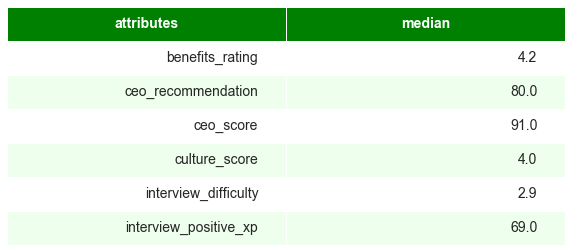

In [60]:
import matplotlib.pyplot as plt
import six


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#008000', row_colors=['#EFFFED', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(gd_stats,header_columns=0, col_width=5.0)

In [61]:
gd_copy['ranking'] = np.where((gd_copy['rank']<11)&(gd_copy['rank']>0), '1-10',\
np.where((gd_copy['rank']<21)&(gd_copy['rank']>10), '11-20',\
np.where((gd_copy['rank']<31)&(gd_copy['rank']>20), '21-30',\
np.where((gd_copy['rank']<41)&(gd_copy['rank']>30), '31-40',\
         np.where((gd_copy['rank']<51)&(gd_copy['rank']>40), '41-50','50+')))))

In [62]:
ranking = gd_copy.groupby('ranking').agg('mean')[['one_return']]

In [63]:
ranking = ranking.reset_index()

In [64]:
ranking.one_return = round(ranking.one_return,1)

In [65]:
ranking

ranking  one_return
0    1-10        23.3
1   11-20        20.8
2   21-30        21.2
3   31-40        17.0
4   41-50        17.0
5     50+        12.9

In [66]:
ranking_copy = ranking

In [67]:
ranking_copy['rank'] = [1,2,3,4,5,6]

In [68]:
ranking_copy['rank'].corr(ranking_copy['one_return'])

-0.9572728033433598

In [69]:
ranking_copy

ranking  one_return  rank
0    1-10        23.3     1
1   11-20        20.8     2
2   21-30        21.2     3
3   31-40        17.0     4
4   41-50        17.0     5
5     50+        12.9     6

In [70]:
gd_copy['rank'].corr(gd_copy['one_return'])

-0.08389439263228313

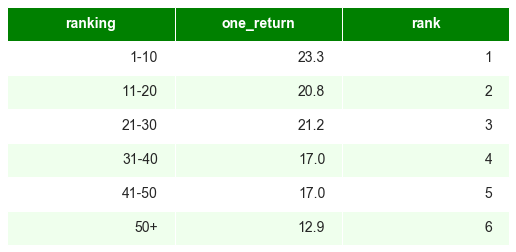

In [71]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#008000', row_colors=['#EFFFED', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(ranking,header_columns=0, col_width=3.0)

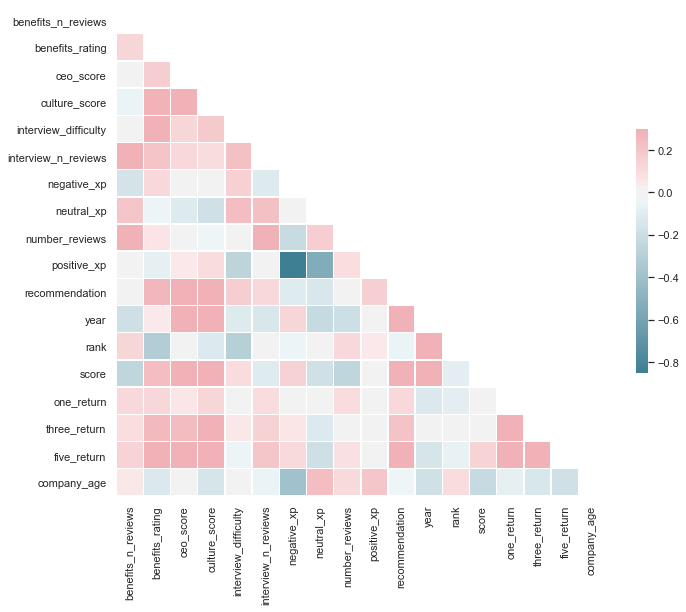

In [72]:
corr = gd_copy.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [73]:
gd_public = gd_copy.drop(gd_copy.loc[np.isnan(gd_copy.one_return)\
            & np.isnan(gd_copy.three_return) & np.isnan(gd_copy.five_return)].index)

In [74]:
gd_public

benefits_n_reviews  benefits_rating  ceo_score  \
0                   488              4.7       91.0   
3                   693              3.9       80.0   
5                  2918              4.3       77.0   
10                  719              4.6       96.0   
11                 2918              4.3       77.0   
12                  547              3.8       86.0   
13                 1377              4.3       92.0   
14                  787              3.9       90.0   
15                  345              4.2       93.0   
16                  729              3.9       91.0   
22                  377              4.2       92.0   
23                   31              4.0       96.0   
24                  322              4.3       84.0   
28                 1610              4.1       91.0   
29                  182              3.7       94.0   
34                  319              3.9       84.0   
37                  714              4.4       92.0   
38                  214              4.0       92.0   
40                  542              4.2       86.0   
44                 2303              4.5       91.0   
45                  428              4.3       87.0   
50                   46              3.8       98.0   
52                  186              4.1       96.0   
56                 1354              4.4       95.0   
60                   79              4.2       94.0   
66                  532              4.4       94.0   
77                  595              4.5       93.0   
79                  193              3.9       98.0   
81                 2670              4.4       97.0   
82                  123              4.2       96.0   
85                  370              4.6       97.0   
87                  440              4.1       88.0   
94                  135              4.1       93.0   
96                  154              4.2       97.0   
97                  104              4.6       98.0   
101                  62              4.4       97.0   
102                 719              4.6       96.0   
103                 321              4.5       91.0   
104                 198              4.0       92.0   
105                1243              4.6       92.0   
106                 488              4.7       91.0   
111                  32              4.4       96.0   
113                 547              3.8       86.0   
114                1610              4.1       91.0   
115                 719              4.6       96.0   
116                2000              3.6       77.0   
117                3172              3.9       72.0   
120                 214              4.0       92.0   
121                 929              3.7       86.0   
122                 434              3.9       88.0   
123                 775              3.9       63.0   
126                 730              4.0       93.0   
128                 143              3.6       80.0   
130                 442              3.9       54.0   
131                 308              4.2       83.0   
132                1383              3.7       88.0   
133                 542              4.2       86.0   
134                 377              4.2       92.0   
137                 485              4.0       93.0   
138                 787              3.9       90.0   
139                 221              4.2       80.0   
140                2303              4.5       91.0   
143                 417              3.9       75.0   
144                 361              4.0       88.0   
146                 147              4.3       84.0   
148                 595              4.5       93.0   
149                 319              3.9       84.0   
150                 519              4.3       96.0   
154                 370              4.6       97.0   
155                 117              4.2       92.0   
157                 228              4.1       89.0   
160                 347              4.1     

In [75]:
col = {'one_return':['count','min','max','mean','median','std'],
      'three_return':['count','min','max','mean','median','std'],
      'five_return':['count','min','max','mean','median','std']}
gd_public.groupby('year').agg(col)

one_return                                              three_return  \
            count    min     max       mean  median        std        count   
year                                                                          
2009.0         30  -2.48  194.33  60.792667  50.900  47.246781           30   
2010.0         27 -54.34   63.62  16.769630  13.220  27.727228           27   
2011.0         28 -50.65   32.55  -7.162143  -2.870  22.345067           28   
2012.0         27 -79.42   43.91   6.835556  10.590  24.986969           27   
2013.0         24 -10.32   89.17  32.950417  24.225  27.904033           24   
2014.0         31 -32.95  122.03  17.863226  15.640  27.036387           31   
2015.0         21 -36.75   68.49   6.122381   4.920  24.873662           21   
2016.0         24 -68.16   54.24   6.256250   4.280  25.363386           24   
2017.0         20 -11.25  113.84  34.435000  33.240  26.319924            0   
2018.0         45 -28.74   69.49  12.242444   8.430  24.626407            0   
2019.0         33 -30.60   81.99  21.610606  21.540  25.370293            0   

                                                    five_return                \
          min     max       mean  median        std       count    min    max   
year                                                                            
2009.0   1.11   60.16  23.981333  21.735  16.884929          30   3.40  67.27   
2010.0 -33.74   40.34   8.778148   7.320  15.035317          27  -4.45  40.28   
2011.0 -10.46   29.56  12.296071  12.620   8.841773          28 -13.39  28.34   
2012.0 -31.28   71.12  15.951481  17.860  18.103309          27 -29.85  45.97   
2013.0  -7.05   64.36  18.510417  16.065  19.579238          24  -1.17  45.81   
2014.0 -30.06   39.07  11.628065  13.590  11.859260          30  -8.11  30.69   
2015.0  -3.23  115.56  17.560000  13.410  24.673319           0    NaN    NaN   
2016.0 -19.42   53.22  16.531250  13.855  14.418695           0    NaN    NaN   
2017.0    NaN     NaN        NaN     NaN        NaN           0    NaN    NaN   
2018.0    NaN     NaN        NaN     NaN        NaN           0    NaN    NaN   
2019.0    NaN     NaN        NaN     NaN        NaN           0    NaN    NaN   

                                      
             mean  median        std  
year                                  
2009.0  23.065667  19.620  12.599842  
2010.0  15.251852  13.140  10.741649  
2011.0   8.412143   8.560  11.127647  
2012.0  13.481481  15.480  14.363721  
2013.0  17.797083  16.805  11.246839  
2014.0  13.709000  14.325   8.700066  
2015.0        NaN     NaN        NaN  
2016.0        NaN     NaN        NaN  
2017.0        NaN     NaN        NaN  
2018.0        NaN     NaN        NaN  
2019.0        NaN     NaN        NaN

In [76]:
gd_public.agg('mean')

benefits_n_reviews       569.116129
benefits_rating            4.168710
ceo_score                 88.340984
culture_score              3.978387
interview_difficulty       2.918710
interview_n_reviews     2055.325806
negative_xp               15.064516
neutral_xp                17.825806
number_reviews          4240.287097
positive_xp               67.109677
recommendation            78.783871
year                    2014.174194
rank                      32.716129
score                      4.021613
one_return                18.827839
three_return              15.573868
five_return               15.311506
company_age               63.932258
dtype: float64

In [77]:
avg_return = gd_public.groupby('year').agg({'one_return':['mean'],'three_return':['mean'],'five_return':['mean']})

In [78]:
avg_return = avg_return.reset_index()

In [79]:
avg_return = pd.melt(avg_return, id_vars = 'year', var_name = 'class', value_name = 'return')

In [80]:
avg_return

year         class     return
0   2009.0    one_return  60.792667
1   2010.0    one_return  16.769630
2   2011.0    one_return  -7.162143
3   2012.0    one_return   6.835556
4   2013.0    one_return  32.950417
5   2014.0    one_return  17.863226
6   2015.0    one_return   6.122381
7   2016.0    one_return   6.256250
8   2017.0    one_return  34.435000
9   2018.0    one_return  12.242444
10  2019.0    one_return  21.610606
11  2009.0  three_return  23.981333
12  2010.0  three_return   8.778148
13  2011.0  three_return  12.296071
14  2012.0  three_return  15.951481
15  2013.0  three_return  18.510417
16  2014.0  three_return  11.628065
17  2015.0  three_return  17.560000
18  2016.0  three_return  16.531250
19  2017.0  three_return        NaN
20  2018.0  three_return        NaN
21  2019.0  three_return        NaN
22  2009.0   five_return  23.065667
23  2010.0   five_return  15.251852
24  2011.0   five_return   8.412143
25  2012.0   five_return  13.481481
26  2013.0   five_return  17.797083
27  2014.0   five_return  13.709000
28  2015.0   five_return        NaN
29  2016.0   five_return        NaN
30  2017.0   five_return        NaN
31  2018.0   five_return        NaN
32  2019.0   five_return        NaN

In [81]:
data = {'year':[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],\
        'sp_one_return': [26.53, 11.811, 0.144, 14.395, 27.103, 13.635, -0.009, 9.374, 18.593, -3.642, 16.89],\
        'sp_three_return':[12.314,8.602, 13.343, 18.22, 13.03, 7.513, 9.05, 7.718, np.nan, np.nan, np.nan],\
        'sp_five_return':[15.551, 13.093, 10.594, 12.561, 13.376, 7.267, np.nan, np.nan, np.nan, np.nan, np.nan]}
sp = pd.DataFrame(data)

In [82]:
sp

year  sp_one_return  sp_three_return  sp_five_return
0   2009         26.530           12.314          15.551
1   2010         11.811            8.602          13.093
2   2011          0.144           13.343          10.594
3   2012         14.395           18.220          12.561
4   2013         27.103           13.030          13.376
5   2014         13.635            7.513           7.267
6   2015         -0.009            9.050             NaN
7   2016          9.374            7.718             NaN
8   2017         18.593              NaN             NaN
9   2018         -3.642              NaN             NaN
10  2019         16.890              NaN             NaN

In [83]:
sp = pd.melt(sp, id_vars = 'year', var_name = 'class', value_name = 'return')

In [84]:
sp

year            class  return
0   2009    sp_one_return  26.530
1   2010    sp_one_return  11.811
2   2011    sp_one_return   0.144
3   2012    sp_one_return  14.395
4   2013    sp_one_return  27.103
5   2014    sp_one_return  13.635
6   2015    sp_one_return  -0.009
7   2016    sp_one_return   9.374
8   2017    sp_one_return  18.593
9   2018    sp_one_return  -3.642
10  2019    sp_one_return  16.890
11  2009  sp_three_return  12.314
12  2010  sp_three_return   8.602
13  2011  sp_three_return  13.343
14  2012  sp_three_return  18.220
15  2013  sp_three_return  13.030
16  2014  sp_three_return   7.513
17  2015  sp_three_return   9.050
18  2016  sp_three_return   7.718
19  2017  sp_three_return     NaN
20  2018  sp_three_return     NaN
21  2019  sp_three_return     NaN
22  2009   sp_five_return  15.551
23  2010   sp_five_return  13.093
24  2011   sp_five_return  10.594
25  2012   sp_five_return  12.561
26  2013   sp_five_return  13.376
27  2014   sp_five_return   7.267
28  2015   sp_five_return     NaN
29  2016   sp_five_return     NaN
30  2017   sp_five_return     NaN
31  2018   sp_five_return     NaN
32  2019   sp_five_return     NaN

In [85]:
returns = avg_return.append(sp, ignore_index = True)

In [86]:
returns

year            class     return
0   2009.0       one_return  60.792667
1   2010.0       one_return  16.769630
2   2011.0       one_return  -7.162143
3   2012.0       one_return   6.835556
4   2013.0       one_return  32.950417
5   2014.0       one_return  17.863226
6   2015.0       one_return   6.122381
7   2016.0       one_return   6.256250
8   2017.0       one_return  34.435000
9   2018.0       one_return  12.242444
10  2019.0       one_return  21.610606
11  2009.0     three_return  23.981333
12  2010.0     three_return   8.778148
13  2011.0     three_return  12.296071
14  2012.0     three_return  15.951481
15  2013.0     three_return  18.510417
16  2014.0     three_return  11.628065
17  2015.0     three_return  17.560000
18  2016.0     three_return  16.531250
19  2017.0     three_return        NaN
20  2018.0     three_return        NaN
21  2019.0     three_return        NaN
22  2009.0      five_return  23.065667
23  2010.0      five_return  15.251852
24  2011.0      five_return   8.412143
25  2012.0      five_return  13.481481
26  2013.0      five_return  17.797083
27  2014.0      five_return  13.709000
28  2015.0      five_return        NaN
29  2016.0      five_return        NaN
30  2017.0      five_return        NaN
31  2018.0      five_return        NaN
32  2019.0      five_return        NaN
33  2009.0    sp_one_return  26.530000
34  2010.0    sp_one_return  11.811000
35  2011.0    sp_one_return   0.144000
36  2012.0    sp_one_return  14.395000
37  2013.0    sp_one_return  27.103000
38  2014.0    sp_one_return  13.635000
39  2015.0    sp_one_return  -0.009000
40  2016.0    sp_one_return   9.374000
41  2017.0    sp_one_return  18.593000
42  2018.0    sp_one_return  -3.642000
43  2019.0    sp_one_return  16.890000
44  2009.0  sp_three_return  12.314000
45  2010.0  sp_three_return   8.602000
46  2011.0  sp_three_return  13.343000
47  2012.0  sp_three_return  18.220000
48  2013.0  sp_three_return  13.030000
49  2014.0  sp_three_return   7.513000
50  2015.0  sp_three_return   9.050000
51  2016.0  sp_three_return   7.718000
52  2017.0  sp_three_return        NaN
53  2018.0  sp_three_return        NaN
54  2019.0  sp_three_return        NaN
55  2009.0   sp_five_return  15.551000
56  2010.0   sp_five_return  13.093000
57  2011.0   sp_five_return  10.594000
58  2012.0   sp_five_return  12.561000
59  2013.0   sp_five_return  13.376000
60  2014.0   sp_five_return   7.267000
61  2015.0   sp_five_return        NaN
62  2016.0   sp_five_return        NaN
63  2017.0   sp_five_return        NaN
64  2018.0   sp_five_return        NaN
65  2019.0   sp_five_return        NaN

In [87]:
returns.groupby('class').agg('mean')

year     return
class                             
five_return      2014.0  15.286204
one_return       2014.0  18.974185
sp_five_return   2014.0  12.073667
sp_one_return    2014.0  12.256727
sp_three_return  2014.0  11.223750
three_return     2014.0  15.654596

In [88]:
one_returns = returns.loc[(returns['class'] == 'one_return') | (returns['class'] == 'sp_one_return')]

In [89]:
one_returns.groupby('class').agg('mean')

year     return
class                           
one_return     2014.0  18.974185
sp_one_return  2014.0  12.256727

In [90]:
sp_compounded = returns.loc[(returns['class'] == 'sp_one_return')]

In [91]:
sp_compounded

year          class  return
33  2009.0  sp_one_return  26.530
34  2010.0  sp_one_return  11.811
35  2011.0  sp_one_return   0.144
36  2012.0  sp_one_return  14.395
37  2013.0  sp_one_return  27.103
38  2014.0  sp_one_return  13.635
39  2015.0  sp_one_return  -0.009
40  2016.0  sp_one_return   9.374
41  2017.0  sp_one_return  18.593
42  2018.0  sp_one_return  -3.642
43  2019.0  sp_one_return  16.890

In [92]:
sp_compounded['1+return'] = ((sp_compounded['return'])/100)+1

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
sp_compounded['compounded'] = sp_compounded['1+return']

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
sp_compounded = sp_compounded.reset_index()

In [95]:
sp_compounded

index    year          class  return  1+return  compounded
0      33  2009.0  sp_one_return  26.530   1.26530     1.26530
1      34  2010.0  sp_one_return  11.811   1.11811     1.11811
2      35  2011.0  sp_one_return   0.144   1.00144     1.00144
3      36  2012.0  sp_one_return  14.395   1.14395     1.14395
4      37  2013.0  sp_one_return  27.103   1.27103     1.27103
5      38  2014.0  sp_one_return  13.635   1.13635     1.13635
6      39  2015.0  sp_one_return  -0.009   0.99991     0.99991
7      40  2016.0  sp_one_return   9.374   1.09374     1.09374
8      41  2017.0  sp_one_return  18.593   1.18593     1.18593
9      42  2018.0  sp_one_return  -3.642   0.96358     0.96358
10     43  2019.0  sp_one_return  16.890   1.16890     1.16890

In [96]:
sp_eight = pd.DataFrame({'year':float(2008),'compounded':float(1)}, index = [0])

In [97]:
sp_compounded = sp_compounded.append(sp_eight)
sp_compounded  = sp_compounded.sort_values('year').reset_index().drop('index',1)

In [98]:
sp_compounded = sp_compounded.drop('level_0',1)

In [99]:
sp_compounded

year          class  return  1+return  compounded
0   2008.0            NaN     NaN       NaN     1.00000
1   2009.0  sp_one_return  26.530   1.26530     1.26530
2   2010.0  sp_one_return  11.811   1.11811     1.11811
3   2011.0  sp_one_return   0.144   1.00144     1.00144
4   2012.0  sp_one_return  14.395   1.14395     1.14395
5   2013.0  sp_one_return  27.103   1.27103     1.27103
6   2014.0  sp_one_return  13.635   1.13635     1.13635
7   2015.0  sp_one_return  -0.009   0.99991     0.99991
8   2016.0  sp_one_return   9.374   1.09374     1.09374
9   2017.0  sp_one_return  18.593   1.18593     1.18593
10  2018.0  sp_one_return  -3.642   0.96358     0.96358
11  2019.0  sp_one_return  16.890   1.16890     1.16890

In [100]:
for i,e in list(enumerate(sp_compounded['compounded']))[1:12]:
    sp_compounded.iloc[i,2] = sp_compounded.iloc[i-1,2] *sp_compounded.iloc[i,0]

sp_compounded

year          class  return  1+return  compounded
0   2008.0            NaN     NaN       NaN     1.00000
1   2009.0  sp_one_return     NaN   1.26530     1.26530
2   2010.0  sp_one_return     NaN   1.11811     1.11811
3   2011.0  sp_one_return     NaN   1.00144     1.00144
4   2012.0  sp_one_return     NaN   1.14395     1.14395
5   2013.0  sp_one_return     NaN   1.27103     1.27103
6   2014.0  sp_one_return     NaN   1.13635     1.13635
7   2015.0  sp_one_return     NaN   0.99991     0.99991
8   2016.0  sp_one_return     NaN   1.09374     1.09374
9   2017.0  sp_one_return     NaN   1.18593     1.18593
10  2018.0  sp_one_return     NaN   0.96358     0.96358
11  2019.0  sp_one_return     NaN   1.16890     1.16890

In [101]:

sp_compounded

year          class  return  1+return  compounded
0   2008.0            NaN     NaN       NaN     1.00000
1   2009.0  sp_one_return     NaN   1.26530     1.26530
2   2010.0  sp_one_return     NaN   1.11811     1.11811
3   2011.0  sp_one_return     NaN   1.00144     1.00144
4   2012.0  sp_one_return     NaN   1.14395     1.14395
5   2013.0  sp_one_return     NaN   1.27103     1.27103
6   2014.0  sp_one_return     NaN   1.13635     1.13635
7   2015.0  sp_one_return     NaN   0.99991     0.99991
8   2016.0  sp_one_return     NaN   1.09374     1.09374
9   2017.0  sp_one_return     NaN   1.18593     1.18593
10  2018.0  sp_one_return     NaN   0.96358     0.96358
11  2019.0  sp_one_return     NaN   1.16890     1.16890

In [102]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sp_compounded['year'], y = sp_compounded['compounded'], mode = 'lines+markers'))
fig.update_xaxes(title_text='Year', range = [2008,2019], nticks = 12)
fig.update_yaxes(title_text='($)', range = [1,7])
fig.update_layout(title=go.layout.Title(text="$1 invested in S&P 500 Companies",\
                                        x=0, xanchor = 'left',xref="paper"),template = "plotly_white")
fig.show()

In [103]:
gd_compounded =  returns.loc[(returns['class'] == 'one_return')]

In [104]:
gd_compounded['1+return'] = ((gd_compounded['return'])/100)+1

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
gd_compounded['compounded'] = gd_compounded['1+return']

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
gd_compounded['compounded'][1:11]

1     1.167696
2     0.928379
3     1.068356
4     1.329504
5     1.178632
6     1.061224
7     1.062563
8     1.344350
9     1.122424
10    1.216106
Name: compounded, dtype: float64

In [107]:
eight = pd.DataFrame({'year':float(2008),'compounded':float(1)}, index = [0])

In [108]:
gd_compounded = gd_compounded.append(eight)
gd_compounded  = gd_compounded.sort_values('year').reset_index().drop('index',1)

In [109]:
gd_compounded 

year       class     return  1+return  compounded
0   2008.0         NaN        NaN       NaN    1.000000
1   2009.0  one_return  60.792667  1.607927    1.607927
2   2010.0  one_return  16.769630  1.167696    1.167696
3   2011.0  one_return  -7.162143  0.928379    0.928379
4   2012.0  one_return   6.835556  1.068356    1.068356
5   2013.0  one_return  32.950417  1.329504    1.329504
6   2014.0  one_return  17.863226  1.178632    1.178632
7   2015.0  one_return   6.122381  1.061224    1.061224
8   2016.0  one_return   6.256250  1.062563    1.062563
9   2017.0  one_return  34.435000  1.344350    1.344350
10  2018.0  one_return  12.242444  1.122424    1.122424
11  2019.0  one_return  21.610606  1.216106    1.216106

In [110]:
for i,e in list(enumerate(gd_compounded['compounded']))[1:12]:
    gd_compounded.iloc[i,2] = gd_compounded.iloc[i-1,2] *gd_compounded.iloc[i,0]

gd_compounded

year       class  return  1+return  compounded
0   2008.0         NaN     NaN       NaN    1.000000
1   2009.0  one_return     NaN  1.607927    1.607927
2   2010.0  one_return     NaN  1.167696    1.167696
3   2011.0  one_return     NaN  0.928379    0.928379
4   2012.0  one_return     NaN  1.068356    1.068356
5   2013.0  one_return     NaN  1.329504    1.329504
6   2014.0  one_return     NaN  1.178632    1.178632
7   2015.0  one_return     NaN  1.061224    1.061224
8   2016.0  one_return     NaN  1.062563    1.062563
9   2017.0  one_return     NaN  1.344350    1.344350
10  2018.0  one_return     NaN  1.122424    1.122424
11  2019.0  one_return     NaN  1.216106    1.216106

In [111]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=gd_compounded['year'], y = gd_compounded['compounded'], mode = 'lines+markers'))
fig.update_xaxes(title_text='Year', range = [2008,2019], nticks = 12)
fig.update_yaxes(title_text='($)', range = [1,7])
fig.update_layout(title=go.layout.Title(text="$1 invested in Glassdoor's Best Places to Work Public Companies",\
                                        x=0, xanchor = 'left',xref="paper"),template = "plotly_white")
fig.show()

In [112]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=sp_compounded['year'], y = sp_compounded['compounded'],\
                         line = dict(color = 'red',width = 2), mode = 'lines+markers', name = 'S&P 500'))

fig.update_yaxes(title_text='$1 Invested', range = [1,7], title_font = dict(size = 17))
fig.update_layout(template = "plotly_white", autosize = False, width = 1000, height = 750,\
                  legend = go.layout.Legend(x=0.1,y =0.9, traceorder = 'normal', font = dict(size = 17)))

# fig.update_layout(title=go.layout.Title(text="$1 invested in Glassdoor 'Best Places to Work' vs. S&P 500 Companies",\
#                                         x=0, xanchor = 'left',xref="paper"),template = "plotly_white")


fig.add_trace(go.Scatter(x=gd_compounded['year'], y = gd_compounded['compounded'],\
                          line = dict(color = 'green', width = 2), mode = 'lines+markers',name = 'Glassdoor'))
fig.update_xaxes(title_text='Year', range = [2008,2019], nticks = 12, title_font = dict(size = 17))



fig.show()

In [113]:
three_returns = returns.loc[(returns['class'] == 'three_return') | (returns['class'] == 'sp_three_return')].dropna()

In [114]:
three_returns

year            class     return
11  2009.0     three_return  23.981333
12  2010.0     three_return   8.778148
13  2011.0     three_return  12.296071
14  2012.0     three_return  15.951481
15  2013.0     three_return  18.510417
16  2014.0     three_return  11.628065
17  2015.0     three_return  17.560000
18  2016.0     three_return  16.531250
44  2009.0  sp_three_return  12.314000
45  2010.0  sp_three_return   8.602000
46  2011.0  sp_three_return  13.343000
47  2012.0  sp_three_return  18.220000
48  2013.0  sp_three_return  13.030000
49  2014.0  sp_three_return   7.513000
50  2015.0  sp_three_return   9.050000
51  2016.0  sp_three_return   7.718000

In [115]:
five_returns = returns.loc[(returns['class'] == 'five_return') | (returns['class'] == 'sp_five_return')].dropna()

In [116]:
five_returns

year           class     return
22  2009.0     five_return  23.065667
23  2010.0     five_return  15.251852
24  2011.0     five_return   8.412143
25  2012.0     five_return  13.481481
26  2013.0     five_return  17.797083
27  2014.0     five_return  13.709000
55  2009.0  sp_five_return  15.551000
56  2010.0  sp_five_return  13.093000
57  2011.0  sp_five_return  10.594000
58  2012.0  sp_five_return  12.561000
59  2013.0  sp_five_return  13.376000
60  2014.0  sp_five_return   7.267000

In [117]:
one_returns

year          class     return
0   2009.0     one_return  60.792667
1   2010.0     one_return  16.769630
2   2011.0     one_return  -7.162143
3   2012.0     one_return   6.835556
4   2013.0     one_return  32.950417
5   2014.0     one_return  17.863226
6   2015.0     one_return   6.122381
7   2016.0     one_return   6.256250
8   2017.0     one_return  34.435000
9   2018.0     one_return  12.242444
10  2019.0     one_return  21.610606
33  2009.0  sp_one_return  26.530000
34  2010.0  sp_one_return  11.811000
35  2011.0  sp_one_return   0.144000
36  2012.0  sp_one_return  14.395000
37  2013.0  sp_one_return  27.103000
38  2014.0  sp_one_return  13.635000
39  2015.0  sp_one_return  -0.009000
40  2016.0  sp_one_return   9.374000
41  2017.0  sp_one_return  18.593000
42  2018.0  sp_one_return  -3.642000
43  2019.0  sp_one_return  16.890000

In [118]:
one_returns.groupby('class').agg({'return':'mean'})

return
class                   
one_return     18.974185
sp_one_return  12.256727

In [119]:
one_returns[0:10]['year']

0    2009.0
1    2010.0
2    2011.0
3    2012.0
4    2013.0
5    2014.0
6    2015.0
7    2016.0
8    2017.0
9    2018.0
Name: year, dtype: float64

In [120]:
one_returns[11:22]

year          class  return
33  2009.0  sp_one_return  26.530
34  2010.0  sp_one_return  11.811
35  2011.0  sp_one_return   0.144
36  2012.0  sp_one_return  14.395
37  2013.0  sp_one_return  27.103
38  2014.0  sp_one_return  13.635
39  2015.0  sp_one_return  -0.009
40  2016.0  sp_one_return   9.374
41  2017.0  sp_one_return  18.593
42  2018.0  sp_one_return  -3.642
43  2019.0  sp_one_return  16.890

In [121]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=one_returns[0:11]['year'], y = one_returns[0:11]['return'], mode = 'lines+markers'))
fig.update_xaxes(title_text='Year', range = [2009,2019], nticks = 12)
# fig.update_yaxes(title_text='Value A')
fig.update_layout(template = "plotly_white")

fig.add_trace(go.Scatter(x=one_returns[0:11]['year'], y = one_returns[11:22]['return'], mode = 'lines+markers'))
fig.update_xaxes(title_text='Year', range = [2009,2019], nticks = 12)

fig.show()

In [122]:
three_returns

year            class     return
11  2009.0     three_return  23.981333
12  2010.0     three_return   8.778148
13  2011.0     three_return  12.296071
14  2012.0     three_return  15.951481
15  2013.0     three_return  18.510417
16  2014.0     three_return  11.628065
17  2015.0     three_return  17.560000
18  2016.0     three_return  16.531250
44  2009.0  sp_three_return  12.314000
45  2010.0  sp_three_return   8.602000
46  2011.0  sp_three_return  13.343000
47  2012.0  sp_three_return  18.220000
48  2013.0  sp_three_return  13.030000
49  2014.0  sp_three_return   7.513000
50  2015.0  sp_three_return   9.050000
51  2016.0  sp_three_return   7.718000

In [123]:
three_returns.loc[three_returns['class'] == 'three_return','class'] = 'Glassdoor 3-yr Annualized Returns'

In [124]:
three_returns.loc[three_returns['class'] == 'sp_three_return','class'] = 'S&P 500 3-yr Annualized Returns'

In [125]:
three_returns['cohort'] = ['2009-2012','2010-2013','2011-2014','2012-2015','2013-2016','2014-2017', '2015-2018','2016-2019',\
                          '2009-2012','2010-2013','2011-2014','2012-2015','2013-2016','2014-2017', '2015-2018','2016-2019']

In [126]:
three_returns

year                              class     return     cohort
11  2009.0  Glassdoor 3-yr Annualized Returns  23.981333  2009-2012
12  2010.0  Glassdoor 3-yr Annualized Returns   8.778148  2010-2013
13  2011.0  Glassdoor 3-yr Annualized Returns  12.296071  2011-2014
14  2012.0  Glassdoor 3-yr Annualized Returns  15.951481  2012-2015
15  2013.0  Glassdoor 3-yr Annualized Returns  18.510417  2013-2016
16  2014.0  Glassdoor 3-yr Annualized Returns  11.628065  2014-2017
17  2015.0  Glassdoor 3-yr Annualized Returns  17.560000  2015-2018
18  2016.0  Glassdoor 3-yr Annualized Returns  16.531250  2016-2019
44  2009.0    S&P 500 3-yr Annualized Returns  12.314000  2009-2012
45  2010.0    S&P 500 3-yr Annualized Returns   8.602000  2010-2013
46  2011.0    S&P 500 3-yr Annualized Returns  13.343000  2011-2014
47  2012.0    S&P 500 3-yr Annualized Returns  18.220000  2012-2015
48  2013.0    S&P 500 3-yr Annualized Returns  13.030000  2013-2016
49  2014.0    S&P 500 3-yr Annualized Returns   7.513000  2014-2017
50  2015.0    S&P 500 3-yr Annualized Returns   9.050000  2015-2018
51  2016.0    S&P 500 3-yr Annualized Returns   7.718000  2016-2019

In [127]:

fig = px.bar(three_returns, x="cohort", y="return", color="class", barmode="group",\
             title='3-year Annualized Returns: Glassdoor "Best Places to Work" vs S&P 500',\
            labels={'year':'Cohort','return':'Annualized Return (%)','class': ''}\
            ,template = "plotly_white", color_discrete_sequence=['#008000','#DC143C'],\
            width=1000, height=600)


fig.show()

In [128]:
five_returns.loc[five_returns['class'] == 'five_return','class'] = 'Glassdoor 5-yr Annualized Returns'

In [129]:
five_returns['cohort'] = ['2009-2014','2010-2015','2011-2016','2012-2017','2013-2018','2014-2019',\
                          '2009-2014','2010-2015','2011-2016','2012-2017','2013-2018','2014-2019']

In [130]:
five_returns.loc[five_returns['class']== 'sp_five_return','class'] = 'S&P 500 5-yr Annualized Returns'

In [131]:
fig = px.bar(five_returns, x="cohort", y="return", color="class", barmode="group",\
             title='5-year Annualized Returns: Glassdoor "Best Places to Work" vs S&P 500',\
            labels={'year':'Cohort/Year','return':'Annualized Return (%)','class': ''}\
            ,template = "plotly_white", color_discrete_sequence=['#008000','#DC143C'],\
            width=1000, height=600)
fig.show()

In [132]:
gd_copy.groupby('company').agg({'company':['count']}).reset_index().sort_values(('company','count'), ascending = False)

company      
                                                     count
89                                            Google    11
12                                             Apple    11
20                                    Bain & Company    11
195                               Southwest Airlines    10
73                                          Facebook     9
185                                       Salesforce     9
38                                           Chevron     9
192                                           Slalom     9
26                           Boston Consulting Group     9
131                               McKinsey & Company     8
4                                              Adobe     8
141                                             NIKE     7
163                                 Procter & Gamble     7
105                                           Intuit     7
120                                         LinkedIn     7
46                                  Costco Wholesale     7
169                                         Qualcomm     7
231                             Wegmans Food Markets     6
34                                     CareerBuilder     6
214                                     Trader Joe's     6
143                             National Instruments     6
147                                           NetApp     6
101                                  In-N-Out Burger     6
133                         Memorial Sloan Kettering     6
83                                         Genentech     6
92                                             H E B     6
88                                     Goldman Sachs     5
170                                         QuikTrip     5
142                                           NVIDIA     5
146                               Nestlé Purina U.S.     5
182                                              SAP     5
103                                Intel Corporation     5
63                                           Edelman     5
152                              Northwestern Mutual     5
124                                            MITRE     5
84                                     General Mills     5
171                                              REI     5
215                                        Travelers     4
201                                          Stryker     4
129                                        MathWorks     4
76                                             FedEx     4
199                                        Starbucks     4
60                                                EY     4
82                                           Gartner     4
208                                Texas Instruments     4
110                                Johnson & Johnson     4
51                                   Delta Air Lines     4
238                                           Zillow     4
172                                        Rackspace     4
3                                          Accenture     4
42                                            Citrix     4
161                            Power Home Remodeling     4
235                            World Wide Technology     4
86                                           Gensler     3
159                                        Paylocity     3
78                                             Fluor     3
114                                  Keller Williams     3
113                                Kaiser Permanente     3
196                                           SpaceX     3
176                                          Red Hat     3
135                                        Microsoft     3
167                                           Publix     3
210  The Church of Jesus Christ of Latter-day Saints     3
91                                         Guidewire     3
168                                              PwC     3
109                                       John Deere     3
8                                

In [133]:
ind_most_awards = gd_copy.groupby(['industry']).agg({'company':['count']}).reset_index().sort_values(('company','count'), ascending = False)

In [134]:
ind_most_awards = ind_most_awards[0:15]

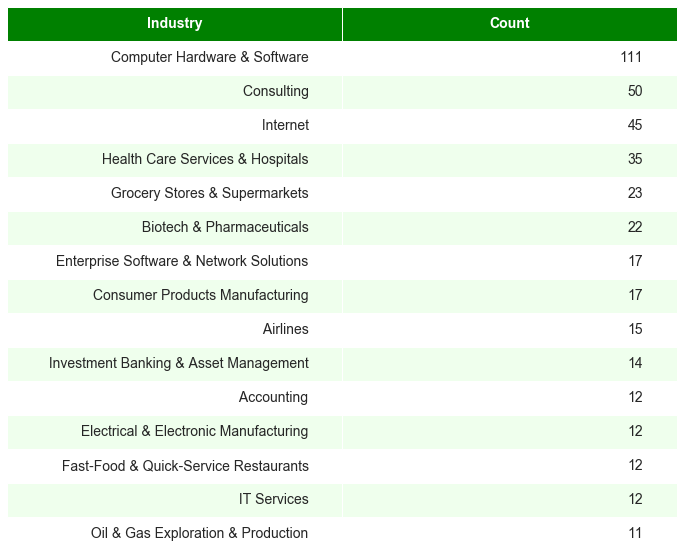

In [135]:

def render_mpl_table(data, col_width=5, row_height=0.625, font_size=14,
                     header_color='#008000', row_colors=['#EFFFED', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=['Industry', 'Count'], **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(ind_most_awards, header_columns=0, col_width= 6.0)

In [136]:
gd_copy.groupby(['industry','year']).agg({'company':['count']}).reset_index().sort_values(('company','count'), ascending = False)

industry    year company
                                                          count
77                 Computer Hardware & Software  2018.0      19
78                 Computer Hardware & Software  2019.0      16
203            Health Care Services & Hospitals  2019.0      13
76                 Computer Hardware & Software  2017.0      12
75                 Computer Hardware & Software  2016.0      10
73                 Computer Hardware & Software  2014.0      10
72                 Computer Hardware & Software  2013.0       9
68                 Computer Hardware & Software  2009.0       8
202            Health Care Services & Hospitals  2018.0       8
74                 Computer Hardware & Software  2015.0       8
96                                   Consulting  2018.0       7
243                                    Internet  2014.0       7
71                 Computer Hardware & Software  2012.0       7
70                 Computer Hardware & Software  2011.0       7
88                                   Consulting  2010.0       5
93                                   Consulting  2015.0       5
91                                   Consulting  2013.0       5
245                                    Internet  2016.0       5
251       Investment Banking & Asset Management  2011.0       5
138     Enterprise Software & Network Solutions  2019.0       5
242                                    Internet  2013.0       5
87                                   Consulting  2009.0       5
69                 Computer Hardware & Software  2010.0       5
94                                   Consulting  2016.0       5
89                                   Consulting  2011.0       4
90                                   Consulting  2012.0       4
97                                   Consulting  2019.0       4
240                                    Internet  2011.0       4
248                                    Internet  2019.0       4
199            Health Care Services & Hospitals  2015.0       4
241                                    Internet  2012.0       4
244                                    Internet  2015.0       4
247                                    Internet  2018.0       4
281                                 Real Estate  2018.0       4
92                                   Consulting  2014.0       3
216                   Hotels, Motels, & Resorts  2018.0       3
189               Grocery Stores & Supermarkets  2019.0       3
188               Grocery Stores & Supermarkets  2018.0       3
187               Grocery Stores & Supermarkets  2017.0       3
184               Grocery Stores & Supermarkets  2014.0       3
254       Investment Banking & Asset Management  2019.0       3
201            Health Care Services & Hospitals  2017.0       3
149       Fast-Food & Quick-Service Restaurants  2018.0       3
250       Investment Banking & Asset Management  2010.0       3
235                          Insurance Carriers  2011.0       3
238                                    Internet  2009.0       3
105             Consumer Products Manufacturing  2015.0       3
95                                   Consulting  2017.0       3
282                                 Real Estate  2019.0       3
246                                    Internet  2017.0       3
108             Consumer Products Manufacturing  2018.0       3
0                                    Accounting  2009.0       3
27                                     Airlines  2018.0       3
45                    Biotech & Pharmaceuticals  2015.0       3
5                                    Accounting  2019.0       3
48                    Biotech & Pharmaceuticals  2018.0       3
49                    Biotech & Pharmaceuticals  2019.0       3
301      Transportation Equipment Manufacturing  2018.0       2
124       Electrical & Electronic Manufacturing  2013.0       2
136     Enterprise Software & Network Solutions  2016.0       2
239                                    Internet  2010.0       2
131    

In [137]:
most_awards = gd_copy.groupby('company').agg({'company':['count']}).reset_index().sort_values(('company','count'), ascending = False)
most_awards


company      
                                                     count
89                                            Google    11
12                                             Apple    11
20                                    Bain & Company    11
195                               Southwest Airlines    10
73                                          Facebook     9
185                                       Salesforce     9
38                                           Chevron     9
192                                           Slalom     9
26                           Boston Consulting Group     9
131                               McKinsey & Company     8
4                                              Adobe     8
141                                             NIKE     7
163                                 Procter & Gamble     7
105                                           Intuit     7
120                                         LinkedIn     7
46                                  Costco Wholesale     7
169                                         Qualcomm     7
231                             Wegmans Food Markets     6
34                                     CareerBuilder     6
214                                     Trader Joe's     6
143                             National Instruments     6
147                                           NetApp     6
101                                  In-N-Out Burger     6
133                         Memorial Sloan Kettering     6
83                                         Genentech     6
92                                             H E B     6
88                                     Goldman Sachs     5
170                                         QuikTrip     5
142                                           NVIDIA     5
146                               Nestlé Purina U.S.     5
182                                              SAP     5
103                                Intel Corporation     5
63                                           Edelman     5
152                              Northwestern Mutual     5
124                                            MITRE     5
84                                     General Mills     5
171                                              REI     5
215                                        Travelers     4
201                                          Stryker     4
129                                        MathWorks     4
76                                             FedEx     4
199                                        Starbucks     4
60                                                EY     4
82                                           Gartner     4
208                                Texas Instruments     4
110                                Johnson & Johnson     4
51                                   Delta Air Lines     4
238                                           Zillow     4
172                                        Rackspace     4
3                                          Accenture     4
42                                            Citrix     4
161                            Power Home Remodeling     4
235                            World Wide Technology     4
86                                           Gensler     3
159                                        Paylocity     3
78                                             Fluor     3
114                                  Keller Williams     3
113                                Kaiser Permanente     3
196                                           SpaceX     3
176                                          Red Hat     3
135                                        Microsoft     3
167                                           Publix     3
210  The Church of Jesus Christ of Latter-day Saints     3
91                                         Guidewire     3
168                                              PwC     3
109                                       John Deere     3
8                                

In [138]:
most_awards = most_awards.loc[most_awards[('company','count')]>6]

In [139]:
most_awards

company      
                             count
89                    Google    11
12                     Apple    11
20            Bain & Company    11
195       Southwest Airlines    10
73                  Facebook     9
185               Salesforce     9
38                   Chevron     9
192                   Slalom     9
26   Boston Consulting Group     9
131       McKinsey & Company     8
4                      Adobe     8
141                     NIKE     7
163         Procter & Gamble     7
105                   Intuit     7
120                 LinkedIn     7
46          Costco Wholesale     7
169                 Qualcomm     7

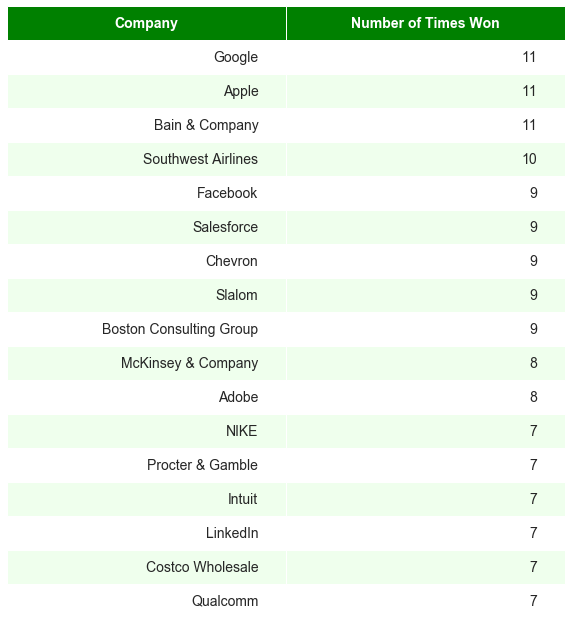

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six



def render_mpl_table(data, col_width=5, row_height=0.625, font_size=14,
                     header_color='#008000', row_colors=['#EFFFED', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=['Company', 'Number of Times Won'], **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(most_awards, header_columns=0, col_width= 5.0)

In [141]:
    
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(gd['reviewspro']))

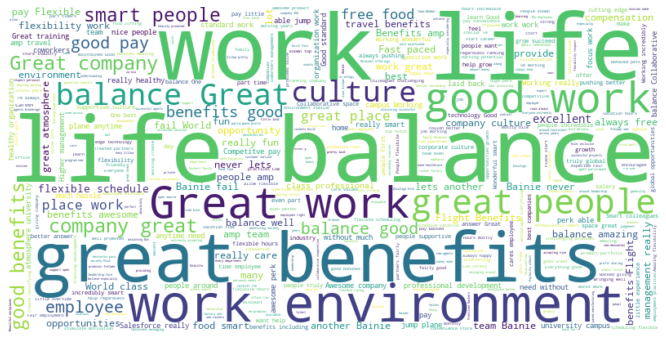

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [143]:
wc.generate(' '.join(gd['reviewspro'])).to_file('./presentation/pro_reviews.png')

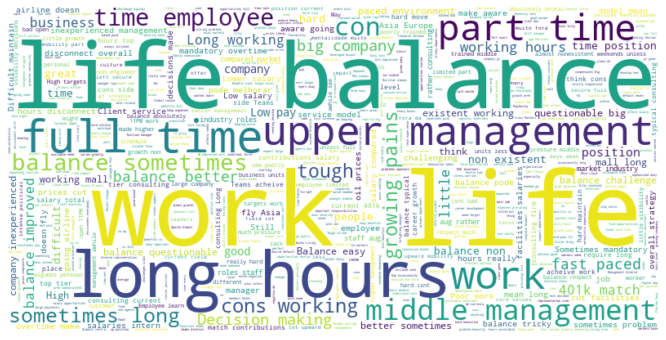

In [144]:


wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(gd['reviewscon']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [145]:
wc.generate(' '.join(gd['reviewscon'])).to_file('./presentation/con_reviews.png')